# Predictive Maintanence for a Delivery Company

In this section, I am trying to develop a model that can predict the probability of a device failure. This dataset is taken from Kaggle.com.

About Dataset

A company has a fleet of devices transmitting daily sensor readings. They would like to create a predictive maintenance solution to proactively identify when maintenance should be performed. This approach promises cost savings over routine or time based preventive maintenance, because tasks are performed only when warranted.

The task is to build a predictive model using machine learning to predict the probability of a device failure. When building this model, be sure to minimize

<img src='https://www.assemblymag.com/ext/resources/2022/06/01/396566134-sensing-insights-image-condition-monitoring-predictive-maintenance.jpg?1654104988' style='display: block; margin-left: auto; margin-right: auto;'>

<a href='https://www.kaggle.com/datasets/hiimanshuagarwal/predictive-maintenance-dataset/data' target= _blank> Can get data from this link

In [79]:
### Import Packages
import pandas as pd
from imblearn.over_sampling import SMOTE #x, y = oversample.fit_resample(x, y)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

In [80]:
### Read Data
df = pd.read_csv('failure.csv')

In [81]:
#df.to_excel("failure.xlsx")

### EDA - Exploratory Data Analysis

In [82]:
df.head()

date    device  failure  attribute1  attribute2  attribute3  \
0  2015-01-01  S1F01085        0   215630672          56           0   
1  2015-01-01  S1F0166B        0    61370680           0           3   
2  2015-01-01  S1F01E6Y        0   173295968           0           0   
3  2015-01-01  S1F01JE0        0    79694024           0           0   
4  2015-01-01  S1F01R2B        0   135970480           0           0   

   attribute4  attribute5  attribute6  attribute7  attribute8  attribute9  
0          52           6      407438           0           0           7  
1           0           6      403174           0           0           0  
2           0          12      237394           0           0           0  
3           0           6      410186           0           0           0  
4           0          15      313173           0           0           3

In [83]:
df.tail()

date    device  failure  attribute1  attribute2  attribute3  \
124489  2015-11-02  Z1F0MA1S        0    18310224           0           0   
124490  2015-11-02  Z1F0Q8RT        0   172556680          96         107   
124491  2015-11-02  Z1F0QK05        0    19029120        4832           0   
124492  2015-11-02  Z1F0QL3N        0   226953408           0           0   
124493  2015-11-02  Z1F0QLC1        0    17572840           0           0   

        attribute4  attribute5  attribute6  attribute7  attribute8  attribute9  
124489           0          10      353705           8           8           0  
124490           4          11      332792           0           0          13  
124491           0          11      350410           0           0           0  
124492           0          12      358980           0           0           0  
124493           0          10      351431           0           0           0

In [84]:
df.shape

(124494, 12)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [86]:
df.describe().T

count          mean           std  min         25%  \
failure     124494.0  8.514467e-04  2.916725e-02  0.0         0.0   
attribute1  124494.0  1.223868e+08  7.045960e+07  0.0  61276754.0   
attribute2  124494.0  1.594848e+02  2.179658e+03  0.0         0.0   
attribute3  124494.0  9.940455e+00  1.857473e+02  0.0         0.0   
attribute4  124494.0  1.741120e+00  2.290851e+01  0.0         0.0   
attribute5  124494.0  1.422269e+01  1.594302e+01  1.0         8.0   
attribute6  124494.0  2.601729e+05  9.915101e+04  8.0    221452.0   
attribute7  124494.0  2.925282e-01  7.436924e+00  0.0         0.0   
attribute8  124494.0  2.925282e-01  7.436924e+00  0.0         0.0   
attribute9  124494.0  1.245152e+01  1.914256e+02  0.0         0.0   

                    50%          75%          max  
failure             0.0          0.0          1.0  
attribute1  122795744.0  183308370.0  244140480.0  
attribute2          0.0          0.0      64968.0  
attribute3          0.0          0.0      24929.0  
attribute4          0.0          0.0       1666.0  
attribute5         10.0         12.0         98.0  
attribute6     249799.5     310266.0     689161.0  
attribute7          0.0          0.0        832.0  
attribute8          0.0          0.0        832.0  
attribute9          0.0          0.0      18701.0

In [87]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [88]:
df['device'].value_counts()

device
S1F0FGBQ    304
W1F0SJJ2    304
Z1F0GE1M    304
Z1F0KJDS    304
Z1F0KKN4    304
           ... 
Z1F0LT6P      5
Z1F0LT6Z      5
W1F1CJKT      5
S1F04KSC      4
W1F0WJFT      3
Name: count, Length: 1168, dtype: int64

In [89]:
# find distinct device's fisrt 3 characters for model
df['device_model'] = df['device'].apply(lambda x: x[:3])

In [90]:
# find distinct device's fisrt 4 characters for series
df['device_serie'] = df['device'].apply(lambda x: x[:4])

In [91]:
df.head()

date    device  failure  attribute1  attribute2  attribute3  \
0  2015-01-01  S1F01085        0   215630672          56           0   
1  2015-01-01  S1F0166B        0    61370680           0           3   
2  2015-01-01  S1F01E6Y        0   173295968           0           0   
3  2015-01-01  S1F01JE0        0    79694024           0           0   
4  2015-01-01  S1F01R2B        0   135970480           0           0   

   attribute4  attribute5  attribute6  attribute7  attribute8  attribute9  \
0          52           6      407438           0           0           7   
1           0           6      403174           0           0           0   
2           0          12      237394           0           0           0   
3           0           6      410186           0           0           0   
4           0          15      313173           0           0           3   

  device_model device_serie  
0          S1F         S1F0  
1          S1F         S1F0  
2          S1F         S1F0  
3          S1F         S1F0  
4          S1F         S1F0

In [92]:
df['device_model'].unique()

array(['S1F', 'W1F', 'Z1F'], dtype=object)

In [93]:
df['device_serie'].unique()

array(['S1F0', 'S1F1', 'W1F0', 'W1F1', 'Z1F0', 'Z1F1', 'Z1F2'],
      dtype=object)

In [94]:
df['device_model'].value_counts()

device_model
S1F    54858
W1F    43268
Z1F    26368
Name: count, dtype: int64

In [95]:
df['device_serie'].value_counts()

device_serie
S1F0    33169
W1F0    23294
S1F1    21689
W1F1    19974
Z1F0    18869
Z1F1     7248
Z1F2      251
Name: count, dtype: int64

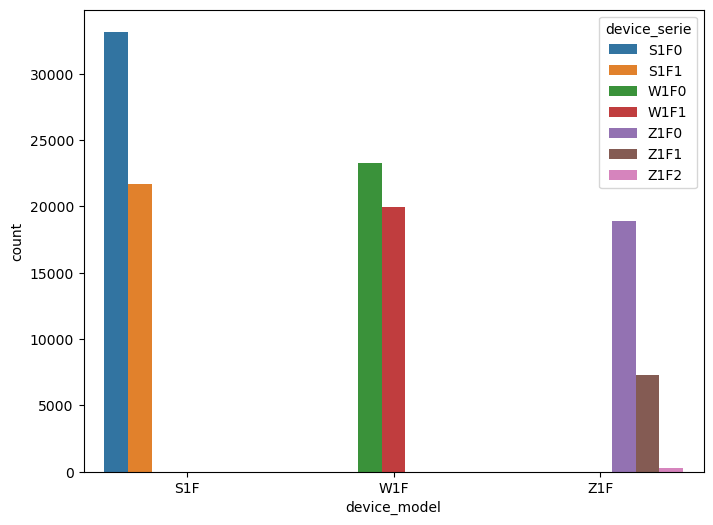

In [96]:
plt.figure(figsize=(8, 6))
sns.countplot(x= 'device_model', hue = 'device_serie', data=df);

In [97]:
df['failure'].value_counts()

failure
0    124388
1       106
Name: count, dtype: int64

AttributeError: 'numpy.int64' object has no attribute 'startswith'

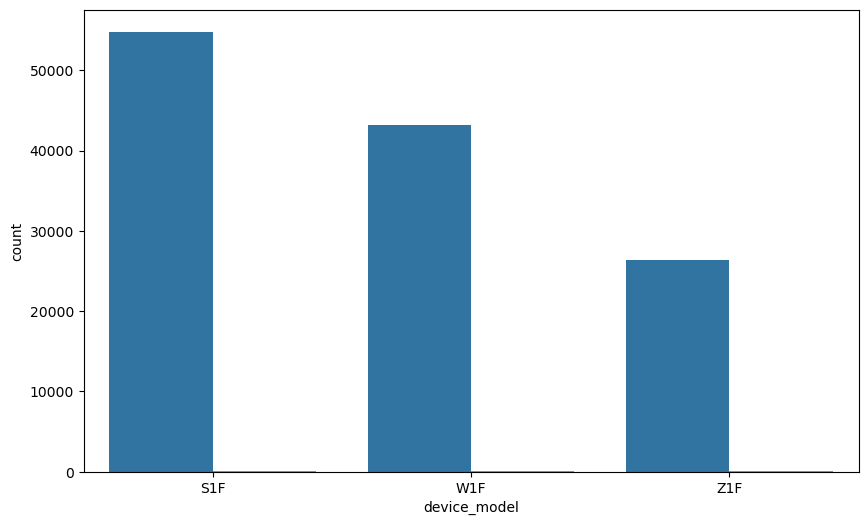

In [98]:
plt.figure(figsize=(10, 6))
ax=sns.countplot(x='device_model', hue = 'failure', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.show()

In [99]:
px.bar(df, x = 'device_model', y = 'failure', color = 'device_serie')

In [100]:
df['attribute1'].value_counts()

attribute1
57192360     26
165048912    26
89196552     26
169490248    23
169467344    15
             ..
181770800     1
201893264     1
238768304     1
53326688      1
17572840      1
Name: count, Length: 123878, dtype: int64

In [101]:
df['attribute6'].value_counts()

attribute6
31        777
44        708
27        636
26        520
29        441
         ... 
333227      1
210463      1
218313      1
251108      1
351431      1
Name: count, Length: 44838, dtype: int64

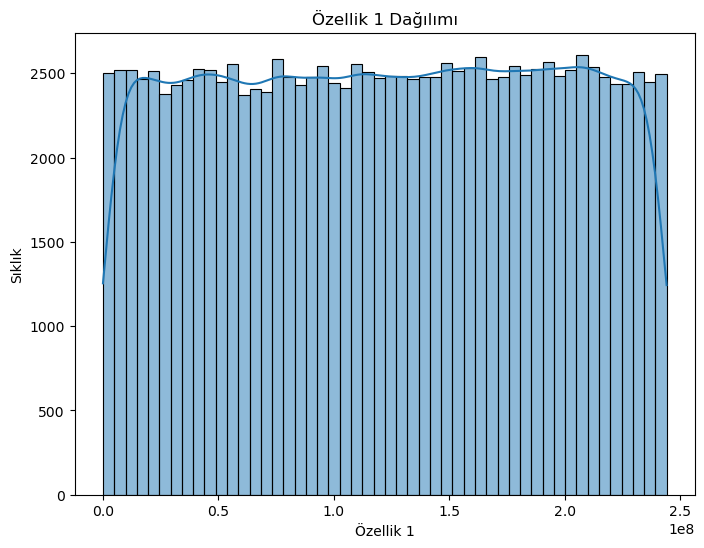

In [102]:
# Veri setinin genel dağılımını gösteren histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="attribute1", kde=True)
plt.title("Özellik 1 Dağılımı")
plt.xlabel("Özellik 1")
plt.ylabel("Sıklık")
plt.show()


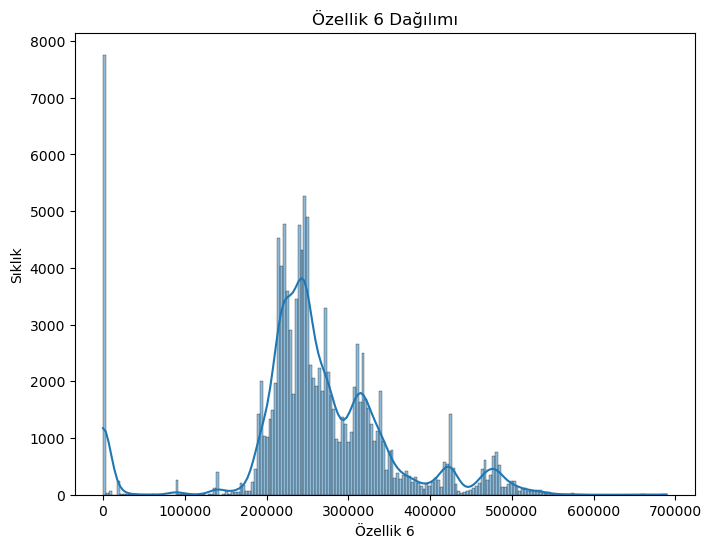

In [103]:
# Veri setinin genel dağılımını gösteren histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="attribute6", kde=True)
plt.title("Özellik 6 Dağılımı")
plt.xlabel("Özellik 6")
plt.ylabel("Sıklık")
plt.show()


### Feature Engineering

In [104]:
df['year'] = df['date'].str[:4].astype(int)
df['month'] = df['date'].str[5:7].astype(int)
df['day'] = df['date'].str[8:10].astype(int)

In [105]:
df.sample(5)

date    device  failure  attribute1  attribute2  attribute3  \
45542   2015-03-02  W1F0LSFS        0   124755304           0           0   
23814   2015-01-30  S1F10AS0        0    41127272           0           0   
112422  2015-08-12  S1F10QDG        0    35005112           0           0   
15075   2015-01-18  S1F0EGMT        0    36138256           0           0   
54060   2015-03-15  S1F0R3JV        0    38286776           0           0   

        attribute4  attribute5  attribute6  attribute7  attribute8  \
45542            0           6      216371           0           0   
23814            0          10      429003           0           0   
112422           0           5      260096           0           0   
15075            0           9      216658           0           0   
54060            0           7      215880           0           0   

        attribute9 device_model device_serie  year  month  day  
45542            0          W1F         W1F0  2015      3    2  
23814            0          S1F         S1F1  2015      1   30  
112422           0          S1F         S1F1  2015      8   12  
15075            0          S1F         S1F0  2015      1   18  
54060            0          S1F         S1F0  2015      3   15

In [106]:
df['year'].value_counts()

year
2015    124494
Name: count, dtype: int64

In [107]:
df['day_type'] = 'WD'
df.loc[pd.to_datetime(df['date']).dt.day_name().isin(['Saturday', 'Sunday']), 'day_type'] = 'WE'

In [108]:
df['day_of_week'] = pd.to_datetime(df['date']).dt.weekday + 1

In [109]:
# convert category the month, day, day_of_week columns

df['month'] = df['month'].astype('category')
df['day'] = df['day'].astype('category')
df['day_of_week'] = df['day_of_week'].astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   date          124494 non-null  object  
 1   device        124494 non-null  object  
 2   failure       124494 non-null  int64   
 3   attribute1    124494 non-null  int64   
 4   attribute2    124494 non-null  int64   
 5   attribute3    124494 non-null  int64   
 6   attribute4    124494 non-null  int64   
 7   attribute5    124494 non-null  int64   
 8   attribute6    124494 non-null  int64   
 9   attribute7    124494 non-null  int64   
 10  attribute8    124494 non-null  int64   
 11  attribute9    124494 non-null  int64   
 12  device_model  124494 non-null  object  
 13  device_serie  124494 non-null  object  
 14  year          124494 non-null  int32   
 15  month         124494 non-null  category
 16  day           124494 non-null  category
 17  day_type      124494 non-null

In [110]:
# drop date and year columns 
df=df.drop('date',axis=1)

In [111]:
df=df.drop('year',axis=1)

In [112]:
# drop attribute7 because same with att8

df=df.drop('attribute7',axis=1)

In [113]:
df.head()

device  failure  attribute1  attribute2  attribute3  attribute4  \
0  S1F01085        0   215630672          56           0          52   
1  S1F0166B        0    61370680           0           3           0   
2  S1F01E6Y        0   173295968           0           0           0   
3  S1F01JE0        0    79694024           0           0           0   
4  S1F01R2B        0   135970480           0           0           0   

   attribute5  attribute6  attribute8  attribute9 device_model device_serie  \
0           6      407438           0           7          S1F         S1F0   
1           6      403174           0           0          S1F         S1F0   
2          12      237394           0           0          S1F         S1F0   
3           6      410186           0           0          S1F         S1F0   
4          15      313173           0           3          S1F         S1F0   

  month day day_type day_of_week  
0     1   1       WD           4  
1     1   1       WD           4  
2     1   1       WD           4  
3     1   1       WD           4  
4     1   1       WD           4

In [114]:
#dev_model and dev_serie new features are created in the EDA section

In [115]:
df=df.drop('device',axis=1)

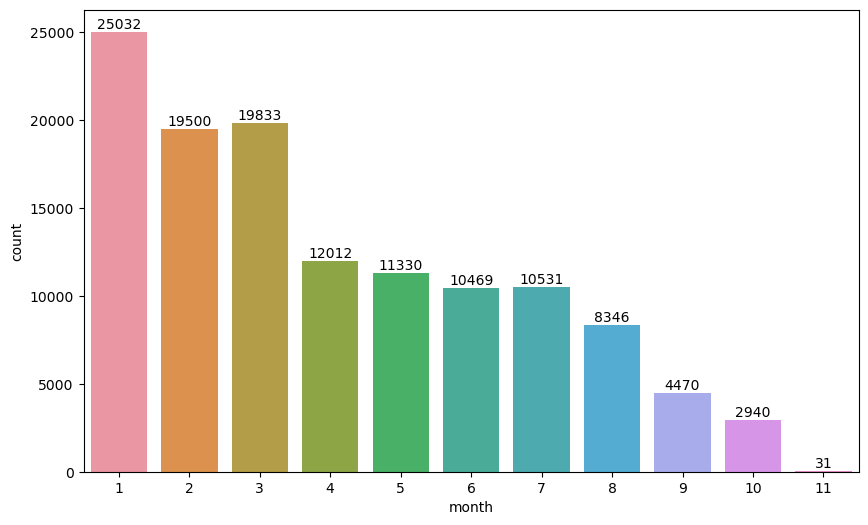

In [116]:
plt.figure(figsize=(10, 6))
ax=sns.countplot(x= 'month', data=df);
ax.bar_label(ax.containers[0])
plt.show()

# In this section we noticed that we need a partial view point for periods that have same or close number of measurements

AttributeError: 'numpy.int64' object has no attribute 'startswith'

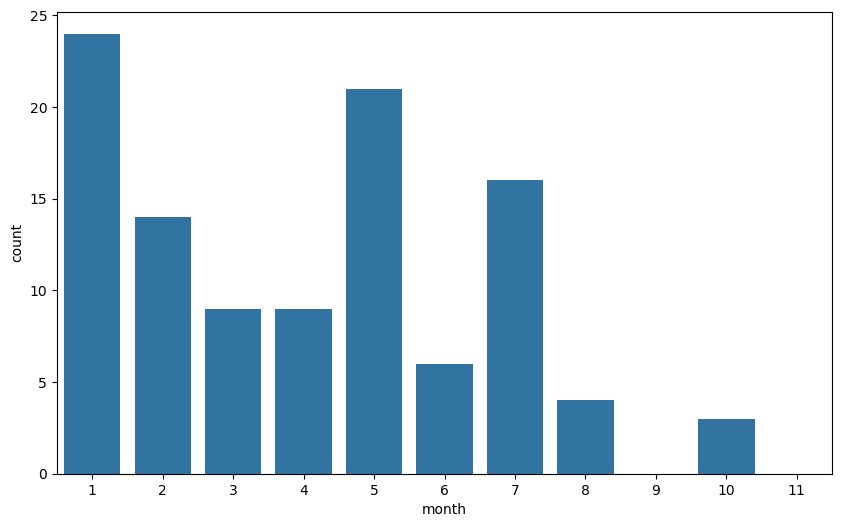

In [117]:
# create countplot for x=month, hue=failure and failure =1
dff=df[df['failure']==1]
plt.figure(figsize=(10, 6))
ax=sns.countplot(x= 'month', hue = 'failure', data=dff);
ax.bar_label(ax.containers[0])
plt.show()

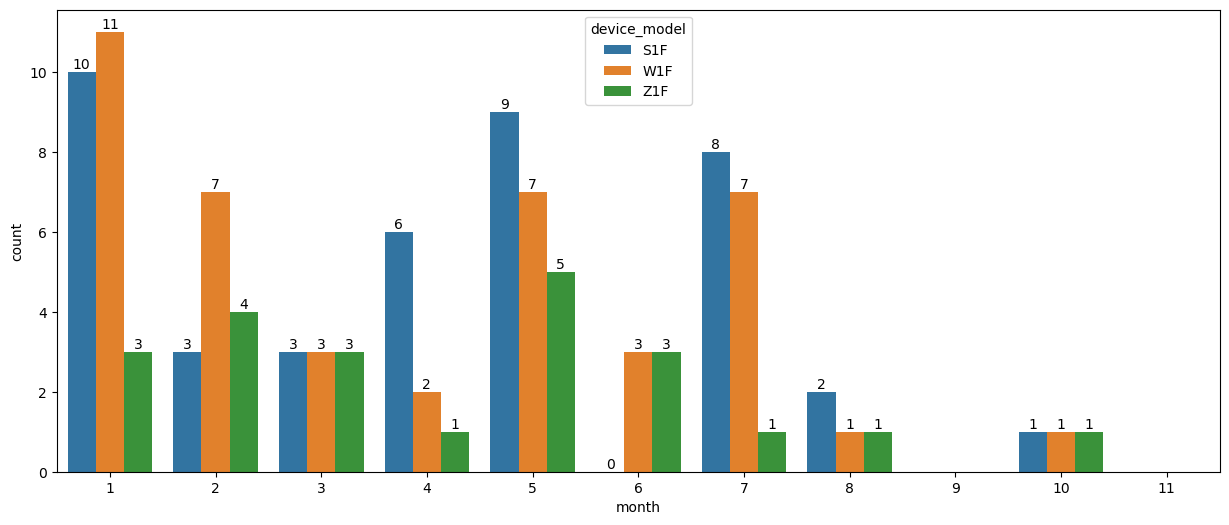

In [118]:
# create a figure with month, failure and device_model
plt.figure(figsize=(15, 6))
ax=sns.countplot(x= 'month', hue = 'device_model', data=dff);
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.show()


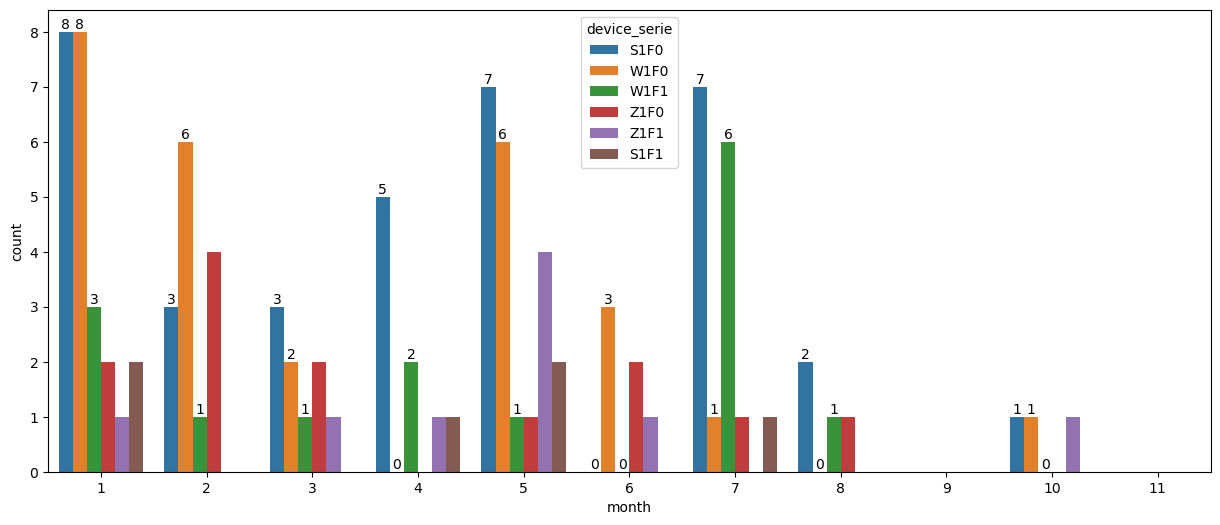

In [119]:
# create a figure with month, failure and device_model
plt.figure(figsize=(15, 6))
ax=sns.countplot(x= 'month', hue = 'device_serie', data=dff);
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.show()


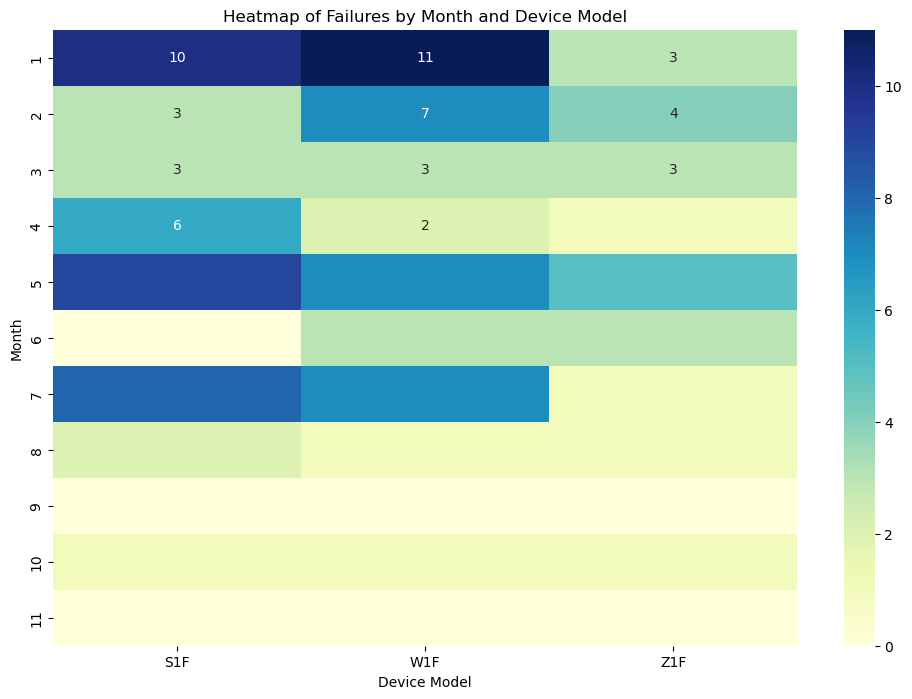

In [120]:
pivot_table = df.pivot_table(index='month', columns='device_model', values='failure', aggfunc='sum', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Failures by Month and Device Model')
plt.xlabel('Device Model')
plt.ylabel('Month')
plt.show()

In [121]:
# create a new column as period_annual 
# that is "first" for months in (1,2,3), 
#         "second" for months in (4,5,6,7,8), 
#         "third" for months in (9,10) 
#     and "fourth" for months in (11,12) 
# to see the volume of months

def get_period_annual(month):
    if month in [1, 2, 3]:
        return 'first'
    elif month in [4, 5, 6, 7, 8]:
        return 'second'
    elif month in [9, 10]:
        return 'third'
    elif month in [11, 12]:
        return 'fourth'

df['period_annual'] = df['month'].apply(get_period_annual)

In [122]:
df.sample(3)

failure  attribute1  attribute2  attribute3  attribute4  attribute5  \
104889        0   172496680           0           0           0          11   
88152         0    90470256           0           0           0          10   
105167        0    95990032           0           0           0          11   

        attribute6  attribute8  attribute9 device_model device_serie month  \
104889      241334           0           0          W1F         W1F0     7   
88152       239413           0           0          S1F         S1F1     6   
105167      218907           0           0          S1F         S1F1     7   

       day day_type day_of_week period_annual  
104889  20       WD           1        second  
88152    2       WD           2        second  
105167  21       WD           2        second

AttributeError: 'numpy.int64' object has no attribute 'startswith'

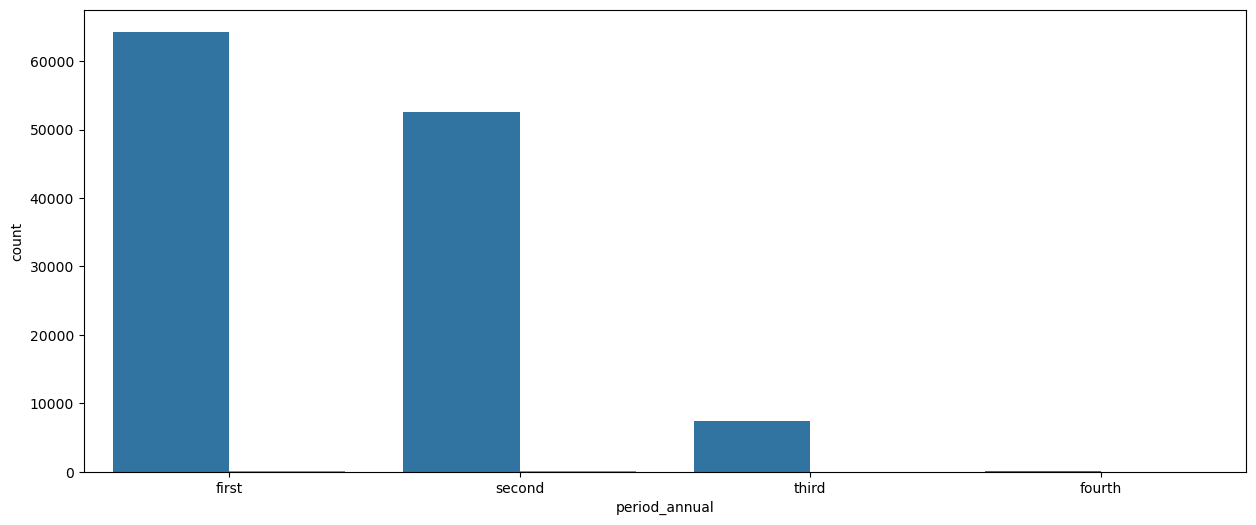

In [123]:
plt.figure(figsize=(15, 6))
ax=sns.countplot(x= 'period_annual', hue = 'failure', data=df);
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

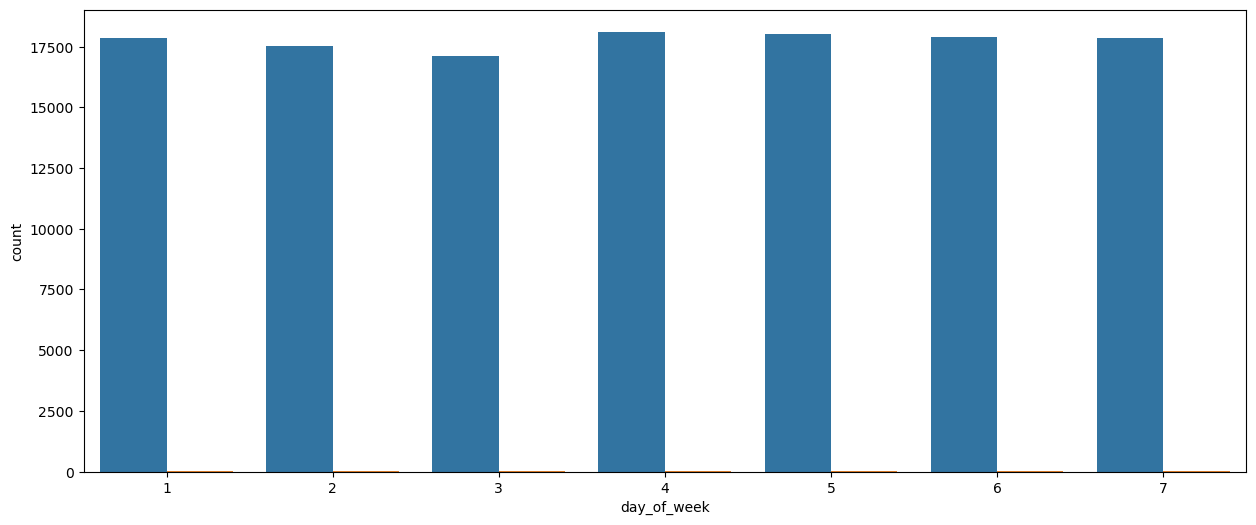

In [124]:
plt.figure(figsize=(15, 6))
ax=sns.countplot(x= 'day_of_week', hue = 'failure', data=df);
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

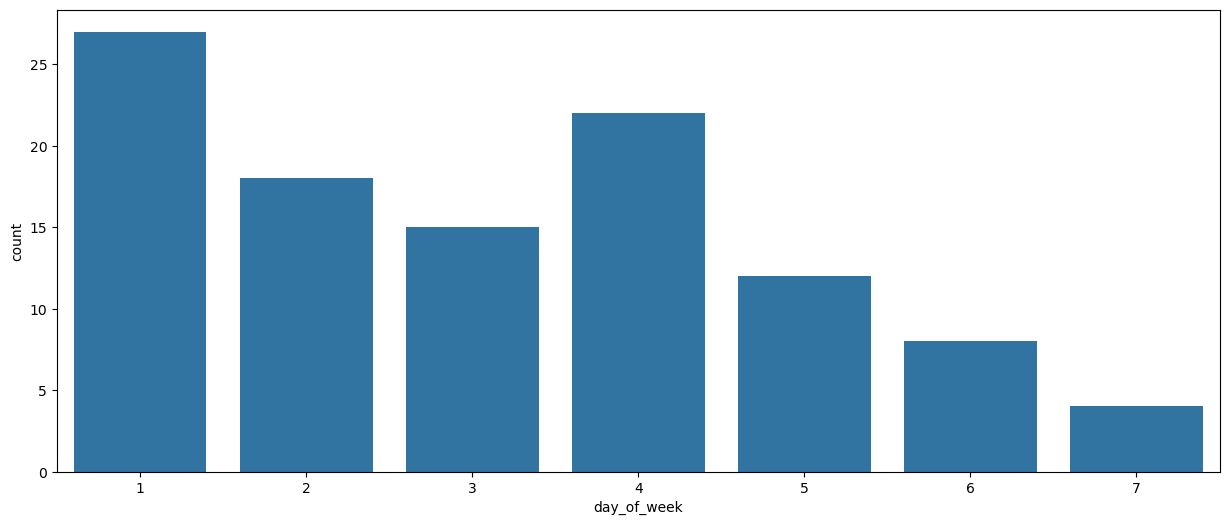

In [125]:
plt.figure(figsize=(15, 6))
ax=sns.countplot(x= 'day_of_week', hue = 'failure', data=dff);
ax.bar_label(ax.containers[0])

plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

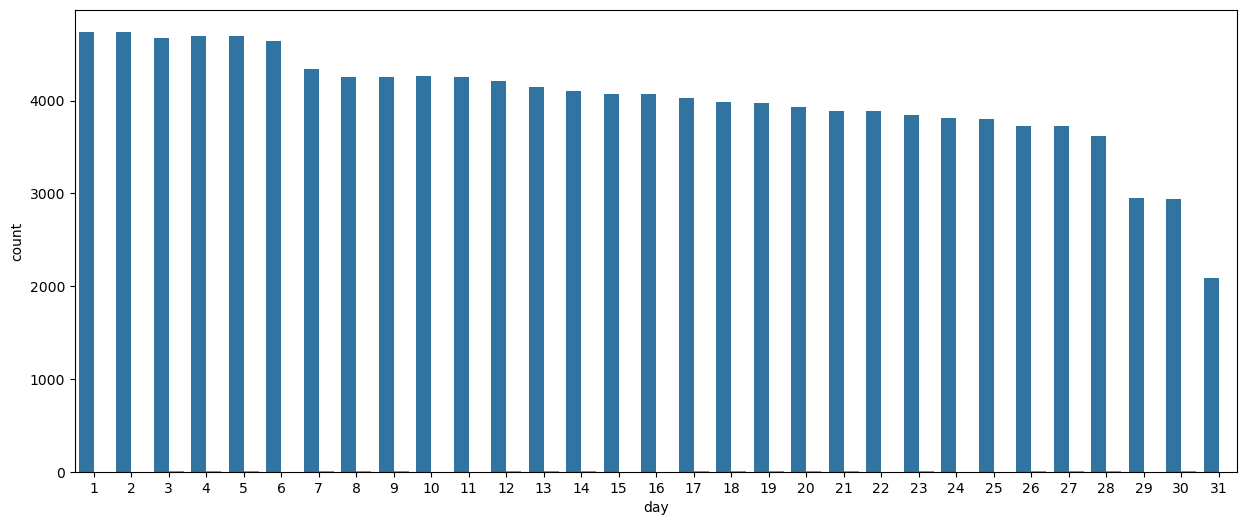

In [126]:
plt.figure(figsize=(15, 6))
ax=sns.countplot(x= 'day', hue = 'failure', data=df);
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

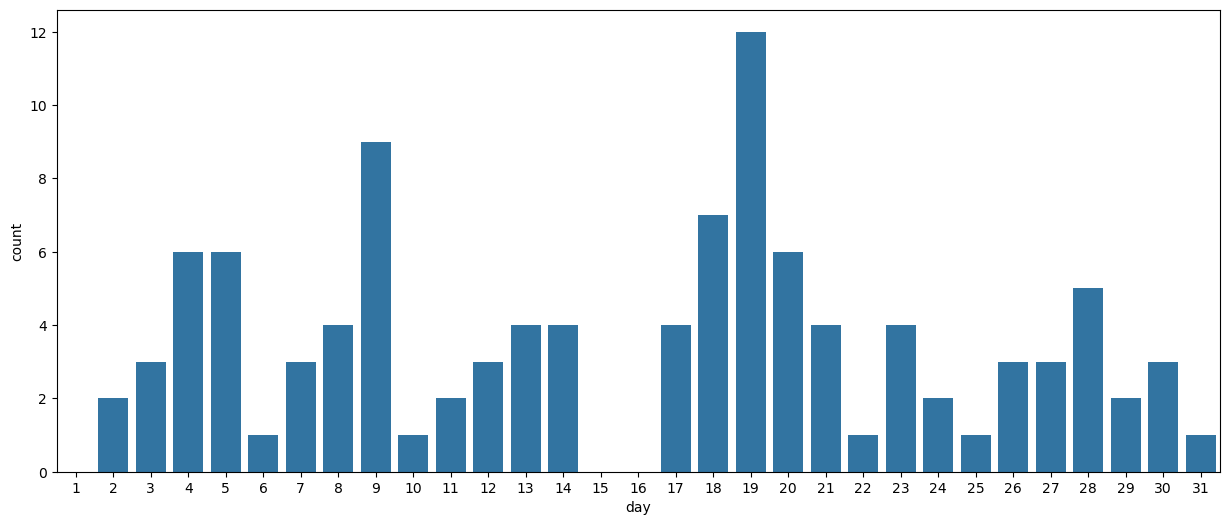

In [127]:
plt.figure(figsize=(15, 6))
ax=sns.countplot(x= 'day', hue = 'failure', data=dff);
ax.bar_label(ax.containers[0])

plt.show()

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   failure        124494 non-null  int64   
 1   attribute1     124494 non-null  int64   
 2   attribute2     124494 non-null  int64   
 3   attribute3     124494 non-null  int64   
 4   attribute4     124494 non-null  int64   
 5   attribute5     124494 non-null  int64   
 6   attribute6     124494 non-null  int64   
 7   attribute8     124494 non-null  int64   
 8   attribute9     124494 non-null  int64   
 9   device_model   124494 non-null  object  
 10  device_serie   124494 non-null  object  
 11  month          124494 non-null  category
 12  day            124494 non-null  category
 13  day_type       124494 non-null  object  
 14  day_of_week    124494 non-null  category
 15  period_annual  124494 non-null  object  
dtypes: category(3), int64(9), object(4)
memory usage: 12.7+ 

In [131]:
cat=['device_model', 'device_serie','day_type', 'period_annual', 'month', 'day', 'day_of_week' ]

In [132]:
df[cat]

device_model device_serie day_type period_annual month day day_of_week
0               S1F         S1F0       WD         first     1   1           4
1               S1F         S1F0       WD         first     1   1           4
2               S1F         S1F0       WD         first     1   1           4
3               S1F         S1F0       WD         first     1   1           4
4               S1F         S1F0       WD         first     1   1           4
...             ...          ...      ...           ...   ...  ..         ...
124489          Z1F         Z1F0       WD        fourth    11   2           1
124490          Z1F         Z1F0       WD        fourth    11   2           1
124491          Z1F         Z1F0       WD        fourth    11   2           1
124492          Z1F         Z1F0       WD        fourth    11   2           1
124493          Z1F         Z1F0       WD        fourth    11   2           1

[124494 rows x 7 columns]

In [133]:
x=df.drop("failure", axis=1)  
y=df['failure']

In [134]:
x = pd.get_dummies(x, columns=cat, drop_first=True)

In [136]:
x

attribute1  attribute2  attribute3  attribute4  attribute5  \
0        215630672          56           0          52           6   
1         61370680           0           3           0           6   
2        173295968           0           0           0          12   
3         79694024           0           0           0           6   
4        135970480           0           0           0          15   
...            ...         ...         ...         ...         ...   
124489    18310224           0           0           0          10   
124490   172556680          96         107           4          11   
124491    19029120        4832           0           0          11   
124492   226953408           0           0           0          12   
124493    17572840           0           0           0          10   

        attribute6  attribute8  attribute9  device_model_W1F  \
0           407438           0           7             False   
1           403174           0           0             False   
2           237394           0           0             False   
3           410186           0           0             False   
4           313173           0           3             False   
...            ...         ...         ...               ...   
124489      353705           8           0             False   
124490      332792           0          13             False   
124491      350410           0           0             False   
124492      358980           0           0             False   
124493      351431           0           0             False   

        device_model_Z1F  device_serie_S1F1  device_serie_W1F0  \
0                  False              False              False   
1                  False              False              False   
2                  False              False              False   
3                  False              False              False   
4                  False              False              False   
...                  ...                ...                ...   
124489              True              False              False   
124490              True              False              False   
124491              True              False              False   
124492              True              False              False   
124493              True              False              False   

        device_serie_W1F1  device_serie_Z1F0  device_serie_Z1F1  \
0                   False              False              False   
1                   False              False              False   
2                   False              False              False   
3                   False              False              False   
4                   False              False              False   
...                   ...                ...                ...   
124489              False               True              False   
124490              False               True              False   
124491              False               True              False   
124492              False               True              False   
124493              False               True              False   

        device_serie_Z1F2  day_type_WE  period_annual_fourth  \
0                   False        False                 False   
1                   False        False                 False   
2                   False        False                 False   
3                   False        False                 False   
4                   False        False                 False   
...                   ...          ...                   ...   
124489              False        False                  True   
124490              False        False                  True   
124491              False        False                  True   
124492              False        False                  True   
124493              False        False                  True   

        period_annual_second  p

In [137]:
# apply SMOTE method to x and y to increase low frequency of minority sample
        
smote = SMOTE(random_state = 42)
x_sm, y_sm = smote.fit_resample(x, y)


In [141]:
x_sm

attribute1  attribute2  attribute3  attribute4  attribute5  \
0        215630672          56           0          52           6   
1         61370680           0           3           0           6   
2        173295968           0           0           0          12   
3         79694024           0           0           0           6   
4        135970480           0           0           0          15   
...            ...         ...         ...         ...         ...   
248771   177450029        5250           0          61           6   
248772    52916314       64745           0         320          10   
248773     6664493           0           0           0           8   
248774    66393487           0           0          49           7   
248775    66432487           0           0          28           8   

        attribute6  attribute8  attribute9  device_model_W1F  \
0           407438           0           7             False   
1           403174           0           0             False   
2           237394           0           0             False   
3           410186           0           0             False   
4           313173           0           3             False   
...            ...         ...         ...               ...   
248771      288247           0           0             False   
248772      156058          13           1             False   
248773      258311           5           0             False   
248774      218233          31           0             False   
248775      266665           4           7             False   

        device_model_Z1F  device_serie_S1F1  device_serie_W1F0  \
0                  False              False              False   
1                  False              False              False   
2                  False              False              False   
3                  False              False              False   
4                  False              False              False   
...                  ...                ...                ...   
248771             False              False              False   
248772             False              False              False   
248773             False              False              False   
248774             False              False              False   
248775              True              False              False   

        device_serie_W1F1  device_serie_Z1F0  device_serie_Z1F1  \
0                   False              False              False   
1                   False              False              False   
2                   False              False              False   
3                   False              False              False   
4                   False              False              False   
...                   ...                ...                ...   
248771              False              False              False   
248772              False              False              False   
248773              False              False              False   
248774              False              False              False   
248775              False              False              False   

        device_serie_Z1F2  day_type_WE  period_annual_fourth  \
0                   False        False                 False   
1                   False        False                 False   
2                   False        False                 False   
3                   False        False                 False   
4                   False        False                 False   
...                   ...          ...                   ...   
248771              False        False                 False   
248772              False        False                 False   
248773              False        False                 False   
248774              False        False                 False   
248775              False        False                 False   

        period_annual_second  p

In [142]:
y_sm

0         0
1         0
2         0
3         0
4         0
         ..
248771    1
248772    1
248773    1
248774    1
248775    1
Name: failure, Length: 248776, dtype: int64

### Modelling

In [138]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        gnb=GaussianNB()
        bnb=BernoulliNB()
        lr=LogisticRegression()
        dt=DecisionTreeClassifier()
        rf=RandomForestClassifier()
        gbc=GradientBoostingClassifier()
        knc=KNeighborsClassifier()
        

       
        
        algos=[gnb,bnb,lr,dt,rf,gbc,knc]
        algo_names=['GaussianNB','BernoulliNB','LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','KNeighborsClassifier']
        
        x_train, x_test, y_train, y_test=train_test_split(x_sm,y_sm,test_size=.20,random_state=42)
        
        confusion_matrixes= []
        classification_reports= []
        accuracy_scores=[]        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            classification_reports.append(classification_report(p , y_test))
            confusion_matrixes.append(confusion_matrix(p , y_test))
            accuracy_scores.append(accuracy_score(p , y_test))

        for i in range(len(algo_names)):
            print('Algorithm:'+ '\n' , algo_names[i])
            print('Confusion Matrix:'+ '\n' , confusion_matrixes[i])
            print('Classification Report: '+ '\n' , classification_reports[i])
            print('Accuracy Score:'+ '\n' , accuracy_scores[i])
            print('************************************************************')

In [139]:
algo_test (x,y)

Algorithm:
 GaussianNB
Confusion Matrix:
 [[24628 20649]
 [  124  4355]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.54      0.70     45277
           1       0.17      0.97      0.30      4479

    accuracy                           0.58     49756
   macro avg       0.58      0.76      0.50     49756
weighted avg       0.92      0.58      0.67     49756

Accuracy Score:
 0.5825026127502211
************************************************************
Algorithm:
 BernoulliNB
Confusion Matrix:
 [[24609   867]
 [  143 24137]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     25476
           1       0.97      0.99      0.98     24280

    accuracy                           0.98     49756
   macro avg       0.98      0.98      0.98     49756
weighted avg       0.98      0.98      0.98     49756

Accuracy Score:
 0.9797009405900796
****************

### Conclusion

For the conclusion, I ask chatgpt to evaluate my models and outputs:

Model analizinizdeki çeşitli doğruluk değerleri ve diğer metrikler hakkında birkaç önemli nokta dikkate alınmalıdır:

**<span style="color:red;">GaussianNB</span>**:
*<span style="color:green;">Accuracy</span>*: 0.58
*<span style="color:green;">Comment</span>*: Düşük bir doğruluk değeri var. Bu modelin verilerinizi yeterince iyi öğrenemediğini veya verilerinizin dağılımına uygun olmadığını gösterebilir. Ayrıca, düşük precision ve recall değerleri, özellikle sınıf 1 için düşük performansı işaret ediyor.

**<span style="color:red;">BernoulliNB</span>**:
*<span style="color:green;">Accuracy</span>*: 0.98
*<span style="color:green;">Comment</span>*: Çok yüksek bir doğruluk değeri var. Precision ve recall değerleri de oldukça yüksek. Bu model, verilerinizi iyi bir şekilde sınıflandırmış gibi görünüyor.

**<span style="color:red;">LogisticRegression</span>**:
*<span style="color:green;">Accuracy</span>*: 0.69
*<span style="color:green;">Comment</span>*: Orta düzeyde bir doğruluk değeri var. Sınıf 0 için precision ve recall yüksekken, sınıf 1 için daha düşük. Bu model sınıflar arasında dengesiz bir performans gösteriyor olabilir.

**<span style="color:red;">DecisionTreeClassifier</span>**:
*<span style="color:green;">Accuracy</span>*: 1.00
*<span style="color:green;">Comment</span>*: Çok yüksek doğruluk. Ancak, bu model aşırı öğrenme (overfitting) gösterebilir, yani eğitim verilerini çok iyi öğrenmiş olabilir, ancak yeni veriler üzerinde kötü performans gösterebilir.

**<span style="color:red;">RandomForestClassifier</span>**:
*<span style="color:green;">Accuracy</span>*: 1.00
*<span style="color:green;">Comment</span>*: Yine çok yüksek doğruluk. Bu model, aşırı öğrenme göstermiş olabilir.

**<span style="color:red;">GradientBoostingClassifier</span>**:
*<span style="color:green;">Accuracy</span>*: 0.98
*<span style="color:green;">Comment</span>*: Yüksek doğruluk değeri. Precision ve recall değerleri de yüksek. Bu modelin iyi performans gösterdiğini söyleyebiliriz.

**<span style="color:red;">KNeighborsClassifier</span>**:
*<span style="color:green;">Accuracy</span>*: 0.85
*<span style="color:green;">Comment</span>*: Yüksek bir doğruluk değeri var. Precision ve recall değerleri de iyi. Bu model de oldukça iyi performans gösteriyor.

**<span style="color:blue;">Genel Yorumlar</span>**:

**<span style="color:red;">Overfitting</span>**: DecisionTreeClassifier ve RandomForestClassifier gibi modellerde %100 doğruluk genellikle aşırı öğrenme belirtisidir. Bu, modelin eğitim verilerini çok iyi öğrendiğini ancak test verileri veya yeni veriler üzerinde iyi performans göstermeyebileceğini gösterir.

**<span style="color:red;">Data Distribution</span>**: GaussianNB'nin düşük performansı, verilerinizin normal dağılım göstermediğini veya bu modelin verilerinizin dağılımına uygun olmadığını gösterebilir.

**<span style="color:red;">High Performance</span>**: BernoulliNB, GradientBoostingClassifier ve KNeighborsClassifier gibi modeller yüksek doğruluk ve diğer metriklerde iyi sonuçlar vermiş. Bu modeller, verilerinizi iyi öğrenmiş ve genellenmiş görünüyor.

**<span style="color:red;">Balanced Performance</span>**: LogisticRegression, farklı sınıflar arasında dengeli bir performans sergiliyor olabilir, ancak doğruluk oranı orta seviyede.

**<span style="color:red;">Sonuç</span>**:
Modelinizin geçerliliğini değerlendirirken, sadece doğruluk oranına bakmak yeterli değildir. Diğer metrikler (precision, recall, f1-score) ve overfitting belirtilerine de dikkat etmelisiniz. Yüksek doğruluk değerleri elde edilen modellerin aşırı öğrenme yapmamış olduğunu doğrulamak için çapraz doğrulama (cross-validation) veya başka test verileri kullanarak performanslarını test etmek faydalı olacaktır.

Ayrıca, model seçiminde verilerinizin yapısını ve iş probleminizi dikkate alarak, doğruluk, precision, recall ve f1-score gibi metriklerin hepsini göz önünde bulundurmanız önemlidir.
